In [71]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
def mean_calc(df):
    mean_list = []
    for i in range(0,11):
        mean_list.append(calculate_mean(df.iloc[:,2:13].values[:,i]))
    return mean_list

In [76]:
def normal_bar(values1,labels,title):
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8
    plt.bar(np.arange(len(values1)), values1, bar_width, alpha=opacity)
    plt.xticks(np.arange(len(values1)), labels)
    plt.title(title)
    plt.legend()
    plt.show()
    return
    

In [36]:
def sus_bar(df1,df2,df3,df4, title):
    '''
    labels = ['I liked the design of the site',
              'The design of this site was similar too other news sites',
              'I think that I would like to use this site frequently',
              'I thought the site was easy to use',
              'The design of this site was unusual to me',
              'I thought there was too much inconsistency in this site',
              'I felt very confident using the site',
              'I thought the material i was looking for was easy to find',
              'I found the site very cumbersome to use',
              'I thought that the amount of information on this site was too sparse',
              'I felt overwhelmed using this site']
    '''
    labels = range(1,12)
    mean_list1 = mean_calc(df1)
    mean_list2 = mean_calc(df2)
    mean_list3 = mean_calc(df3)
    mean_list4 = mean_calc(df4)
    
    bar_width = 0.2
    opacity = 0.8
    plt.figure(figsize=(30, 15))
    plt.bar(np.arange(len(mean_list1))-(bar_width+bar_width/2), mean_list1, bar_width, alpha=opacity, label='QQ, zh')
    plt.bar(np.arange(len(mean_list2))-bar_width/2, mean_list2, bar_width, alpha=opacity, label='QQ, En')
    plt.bar(np.arange(len(mean_list3))+bar_width/2, mean_list3, bar_width, alpha=opacity, label='BBC, Zh')
    plt.bar(np.arange(len(mean_list4))+(bar_width+bar_width/2), mean_list4, bar_width, alpha=opacity, label='BBC, En')
    plt.xticks(np.arange(len(mean_list1)), labels)
    plt.autoscale(tight=False)
    plt.title(title)
    plt.legend()
    plt.show()
    return


In [4]:
def show_bar_chart(values1,values2, labels,title):
    
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8
    plt.bar(np.arange(len(values1))-bar_width/2, values1, bar_width, alpha=opacity,label='English')
    plt.bar(np.arange(len(values1))+bar_width/2, values2, bar_width, alpha=opacity,label='Chinese')
    plt.xticks(np.arange(len(values1)), labels)
    plt.title(title)
    plt.legend()
    plt.show()
    return

In [5]:
def calculate_mean(alist):
    value = sum(alist)/len(alist)
    
    return value

# Data
Stuff here


In [6]:
q_bbc_en = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_bbc_en.csv')
q_qq_en = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_qq_en.csv')
q_bbc_zh = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_bbc_zh.csv')
q_qq_zh = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/questions_main_qq_zh.csv')
actions = pd.read_csv('/Users/marcusliljenberg/Documents/ExJobb/Data/finished/actions.csv')

In [25]:
import MySQLdb

mysql_cn= MySQLdb.connect(host='aa1fk59xwsw9wmv.cg05xtnsvhwq.ap-northeast-2.rds.amazonaws.com', 
                port=3306,user='Marcus', passwd='marcusl36', 
                db='ebdb')
q_bbc_en = pd.read_sql('SELECT Questions.*, Main.*, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "bbc" and Main.Language = "en";', con=mysql_cn)  
q_bbc_zh = pd.read_sql('SELECT Questions.*, Main.*, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "bbc" and Main.Language = "zh";', con=mysql_cn)  
q_qq_en = pd.read_sql('SELECT Questions.*, Main.*, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "qq" and Main.Language = "en";', con=mysql_cn)  
q_qq_zh = pd.read_sql('SELECT Questions.*, Main.*, QuestionText.FPattern FROM Questions Join Main ON Questions.MainId = Main.id Join QuestionText ON Questions.QuestionId = QuestionText.id where Age < 70  and Main.Site = "qq" and Main.Language = "zh";', con=mysql_cn)  

q_qq_zh_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'qq' and Language = 'zh';", con=mysql_cn)  
q_qq_en_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'qq' and Language = 'en';", con=mysql_cn)  
q_bbc_en_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'bbc' and Language = 'en';", con=mysql_cn)  
q_bbc_zh_sus = pd.read_sql("SELECT Sus.*, Main.* FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Site = 'bbc' and Language = 'zh';", con=mysql_cn)  

mysql_cn.close()

In [31]:
mysql_cn= MySQLdb.connect(host='aa1fk59xwsw9wmv.cg05xtnsvhwq.ap-northeast-2.rds.amazonaws.com', 
                port=3306,user='Marcus', passwd='marcusl36', 
                db='ebdb')

users = pd.read_sql("SELECT Sus.Id, Main.Age, Main.Gender, Main.Site, Main.Language FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70;", con=mysql_cn)
male_users = pd.read_sql("SELECT Sus.Id, Main.Age, Main.Gender, Main.Site, Main.Language FROM Sus Join Main ON Sus.MainId = Main.id  where Age < 70 and Gender = 0;", con=mysql_cn)
mysql_cn.close()

In [96]:
desc = q_bbc_en.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,390.000000,390.000000,390.000000
mean,0.846154,24.456410,0.200000
std,0.361265,52.279326,0.400514
min,0.000000,-1.000000,0.000000
25%,1.000000,7.000000,0.000000
50%,1.000000,13.000000,0.000000
75%,1.000000,28.000000,0.000000
max,1.000000,925.000000,1.000000


In [97]:
desc = q_bbc_zh.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,351.000000,351.000000,351.000000
mean,0.660969,22.353276,0.666667
std,0.474056,35.222322,0.472077
min,0.000000,-1.000000,0.000000
25%,0.000000,6.000000,0.000000
50%,1.000000,13.000000,1.000000
75%,1.000000,27.000000,1.000000
max,1.000000,438.000000,1.000000


In [98]:
desc = q_qq_en.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,403.000000,403.000000,403.000000
mean,0.866005,19.258065,0.193548
std,0.341070,24.265076,0.395570
min,0.000000,0.000000,0.000000
25%,1.000000,6.000000,0.000000
50%,1.000000,10.000000,0.000000
75%,1.000000,21.000000,0.000000
max,1.000000,151.000000,1.000000


In [99]:
desc = q_qq_zh.drop(['StartTime', 'EndTime','Id','QuestionId','MainId','Age','FPattern'], axis=1)
desc.describe()

,Correct,Time,Gender
count,247.000000,247.000000,247.000000
mean,0.753036,24.012146,0.736842
std,0.432121,28.176632,0.441241
min,0.000000,1.000000,0.000000
25%,1.000000,7.000000,0.000000
50%,1.000000,13.000000,1.000000
75%,1.000000,28.500000,1.000000
max,1.000000,191.000000,1.000000


In [100]:
q_bbc_en.head()


,Id,MainId,QuestionId,Correct,StartTime,EndTime,Time,Id,Site,Language,Gender,Age,FPattern
0,15,3,27,0,-1 days +23:59:59,15:47:31,10,3,bbc,en,0,26,1
1,42,5,27,0,-1 days +23:59:59,21:59:42,30,5,bbc,en,0,56,1
2,68,7,27,0,-1 days +23:59:59,22:07:35,33,7,bbc,en,1,26,1
3,118,17,27,1,-1 days +23:59:59,01:23:54,21,17,bbc,en,0,26,1
4,160,20,27,1,-1 days +23:59:59,23:49:14,4,20,bbc,en,0,26,1


In [88]:
q_bbc_en_sus.head()

,Id,MainId,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Sum,Id,Site,Language,Gender,Age
0,2,3,5,3,2,4,2,2,4,2,5,3,4,36,3,bbc,en,0,26
1,4,5,4,4,4,3,3,4,3,3,4,2,2,36,5,bbc,en,0,56
2,6,7,3,4,3,4,2,4,3,4,2,2,2,33,7,bbc,en,1,26
3,9,17,3,4,3,3,3,3,3,3,3,3,1,32,17,bbc,en,0,26
4,11,20,4,5,3,5,2,2,5,5,2,2,1,36,20,bbc,en,0,26


In [54]:
users.head()

,Id,Age,Gender,Site,Language
0,1,26,0,qq,en
1,2,26,0,bbc,en
2,3,20,0,qq,en
3,4,56,0,bbc,en
4,5,26,0,qq,en


Total number of users: 99

Male users:   61 
Female users: 38

English users: 59
Chinese users: 40


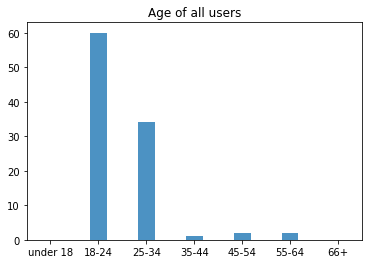

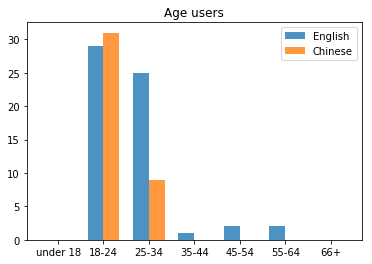

In [77]:
print('Total number of users: {0}'.format(len(users)))

print('\nMale users:   {0} \nFemale users: {1}'.format(len(male_users),(len(users)-len(male_users))))


user_dict = dict()
user_dict[17] = 0
user_dict[20] = 0
user_dict[26] = 0
user_dict[36] = 0
user_dict[46] = 0
user_dict[56] = 0
user_dict[66] = 0
user_dict_en = dict()
user_dict_en[17] = 0
user_dict_en[20] = 0
user_dict_en[26] = 0
user_dict_en[36] = 0
user_dict_en[46] = 0
user_dict_en[56] = 0
user_dict_en[66] = 0
user_dict_zh = dict()
user_dict_zh[17] = 0
user_dict_zh[20] = 0
user_dict_zh[26] = 0
user_dict_zh[36] = 0
user_dict_zh[46] = 0
user_dict_zh[56] = 0
user_dict_zh[66] = 0

for user in users.values:
    user_dict[user[1]] += 1
    if(user[-1]=='en'):
        user_dict_en[user[1]] += 1
    else:
        user_dict_zh[user[1]] += 1
        
print('\nEnglish users: {0}'.format(sum(user_dict_en.values())));
print('Chinese users: {0}'.format(sum(user_dict_zh.values())));
    
user_label = ['under 18', '18-24','25-34','35-44','45-54','55-64','66+']
normal_bar(user_dict.values(),user_label, 'Age of all users')

show_bar_chart(user_dict_en.values(), user_dict_zh.values(),user_label, 'Age users')




# Data Cleaning

# Analasys of the Questions

In [10]:

q_text_id_qq_en_correct = dict()
q_text_id_qq_zh_correct = dict()
q_text_id_bbc_en_correct = dict()
q_text_id_bbc_zh_correct = dict()

q_text_id_qq_en_time = dict()
q_text_id_qq_zh_time = dict()
q_text_id_bbc_en_time = dict()
q_text_id_bbc_zh_time = dict()

for i in range(1,27):
    if(i%2==1):
        q_text_id_qq_en_correct[i] = 0
        q_text_id_qq_en_time[i] = 0
    else:
        q_text_id_qq_zh_correct[i] = 0
        q_text_id_qq_zh_time[i] = 0
        
for i in range(27,53):
    if(i%2==1):
        q_text_id_bbc_en_correct[i] = 0
        q_text_id_bbc_en_time[i] = 0
    else:
        q_text_id_bbc_zh_correct[i] = 0
        q_text_id_bbc_zh_time[i] = 0

In [11]:
bbc_zh_length = 0
bbc_en_length = 0
qq_zh_length = 0
qq_en_length = 0

#Data needs to be cleaned

#question number 13 for qq does not seem to work either
for i in q_bbc_en.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        q_text_id_bbc_en_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[7] < 400):
            q_text_id_bbc_en_time[(i[2])] += int(i[6])
        bbc_en_length += 1
    
for i in q_bbc_zh.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        bbc_zh_length += 1
        q_text_id_bbc_zh_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[7] < 400):
            q_text_id_bbc_zh_time[(i[2])] += int(i[6])
    
for i in q_qq_en.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        qq_en_length += 1
        q_text_id_qq_en_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[7] < 400):
            q_text_id_qq_en_time[(i[2])] += int(i[6])
    
for i in q_qq_zh.values:
    if(actions.loc[actions['QuestionsId'] == int(i[2])]['ScreenWidth'].item() > 1000):
        qq_zh_length += 1
        q_text_id_qq_zh_correct[(i[2])] += int(i[3])
        if(int(i[3])==1 and i[7] < 400):
            q_text_id_qq_zh_time[(i[2])] += int(i[6])
    
bbc_zh_length = bbc_zh_length/13
bbc_en_length = bbc_en_length/13
qq_zh_length = qq_zh_length/13
qq_en_length = qq_en_length/13

print(' ')
print('BBC number of replies, en: {0}'.format(bbc_en_length))
print('BBC number of replies, zh: {0}'.format(bbc_zh_length))
print('QQ number of replies, en: {0}'.format(qq_en_length))
print('QQ number of replies, zh: {0}'.format(qq_zh_length))


 
BBC number of replies, en: 30.0
BBC number of replies, zh: 27.0
QQ number of replies, en: 31.0
QQ number of replies, zh: 19.0


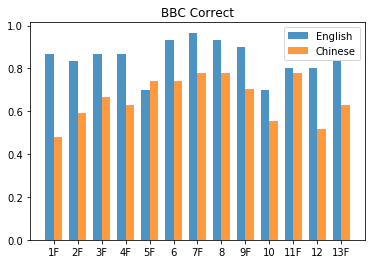

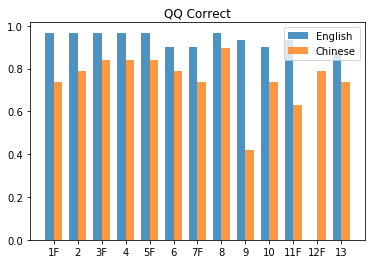

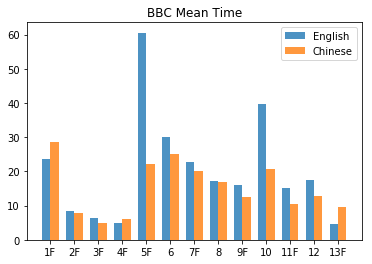

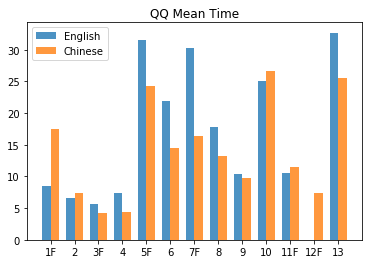

Mean times of correct answers
BBC mean time en: 266.4333333333334
BBC mean time zh: 198.037037037037

QQ mean time en:  208.51612903225805
QQ mean time zh:  182.68421052631575


In [101]:
bbc_labels = ['1F', '2F', '3F', '4F', '5F', '6', '7F','8','9F','10','11F', '12', '13F']
qq_labels = ['1F', '2', '3F', '4', '5F', '6', '7F','8','9','10','11F', '12F', '13']
show_bar_chart([val/bbc_en_length for val in q_text_id_bbc_en_correct.values()],
               [val/bbc_zh_length for val in q_text_id_bbc_zh_correct.values()], bbc_labels, 'BBC Correct')
show_bar_chart([val/qq_en_length for val in q_text_id_qq_en_correct.values()],
               [val/qq_zh_length for val in q_text_id_qq_zh_correct.values()], qq_labels, 'QQ Correct')

show_bar_chart([val/bbc_en_length for val in q_text_id_bbc_en_time.values()],
               [val/bbc_zh_length for val in q_text_id_bbc_zh_time.values()], bbc_labels, 'BBC Mean Time')
show_bar_chart([val/qq_en_length for val in q_text_id_qq_en_time.values()],
               [val/qq_zh_length for val in q_text_id_qq_zh_time.values()], qq_labels, 'QQ Mean Time')
print('Mean times of correct answers')
print('BBC mean time en: {0}'.format(sum([val/bbc_en_length for val in q_text_id_bbc_en_time.values()])))
print('BBC mean time zh: {0}'.format(sum([val/bbc_zh_length for val in q_text_id_bbc_zh_time.values()])))
print('\nQQ mean time en:  {0}'.format(sum([val/qq_en_length for val in q_text_id_qq_en_time.values()])))
print('QQ mean time zh:  {0}'.format(sum([val/qq_zh_length for val in q_text_id_qq_zh_time.values()])))


# Add % of correct results maby in a circle graph

# Sus Analysis

In [ ]:
for row in q_qq_zh_sus:
    #make sure to calculate correct sum for each row here where some rows should be negative

In [23]:

print('QQ, Zh sus mean: {0}'.format(calculate_mean(q_qq_zh_sus['Sum'])))
print('QQ, En sus mean: {0}'.format(calculate_mean(q_qq_en_sus['Sum'])))
print('')

print('BBC, Zh sus mean: {0}'.format(calculate_mean(q_bbc_zh_sus['Sum'])))
print('BBC, En sus mean: {0}'.format(calculate_mean(q_bbc_en_sus['Sum'])))



QQ, Zh sus mean: 30.31578947368421
QQ, En sus mean: 28.233333333333334

BBC, Zh sus mean: 31.38095238095238
BBC, En sus mean: 29.551724137931036


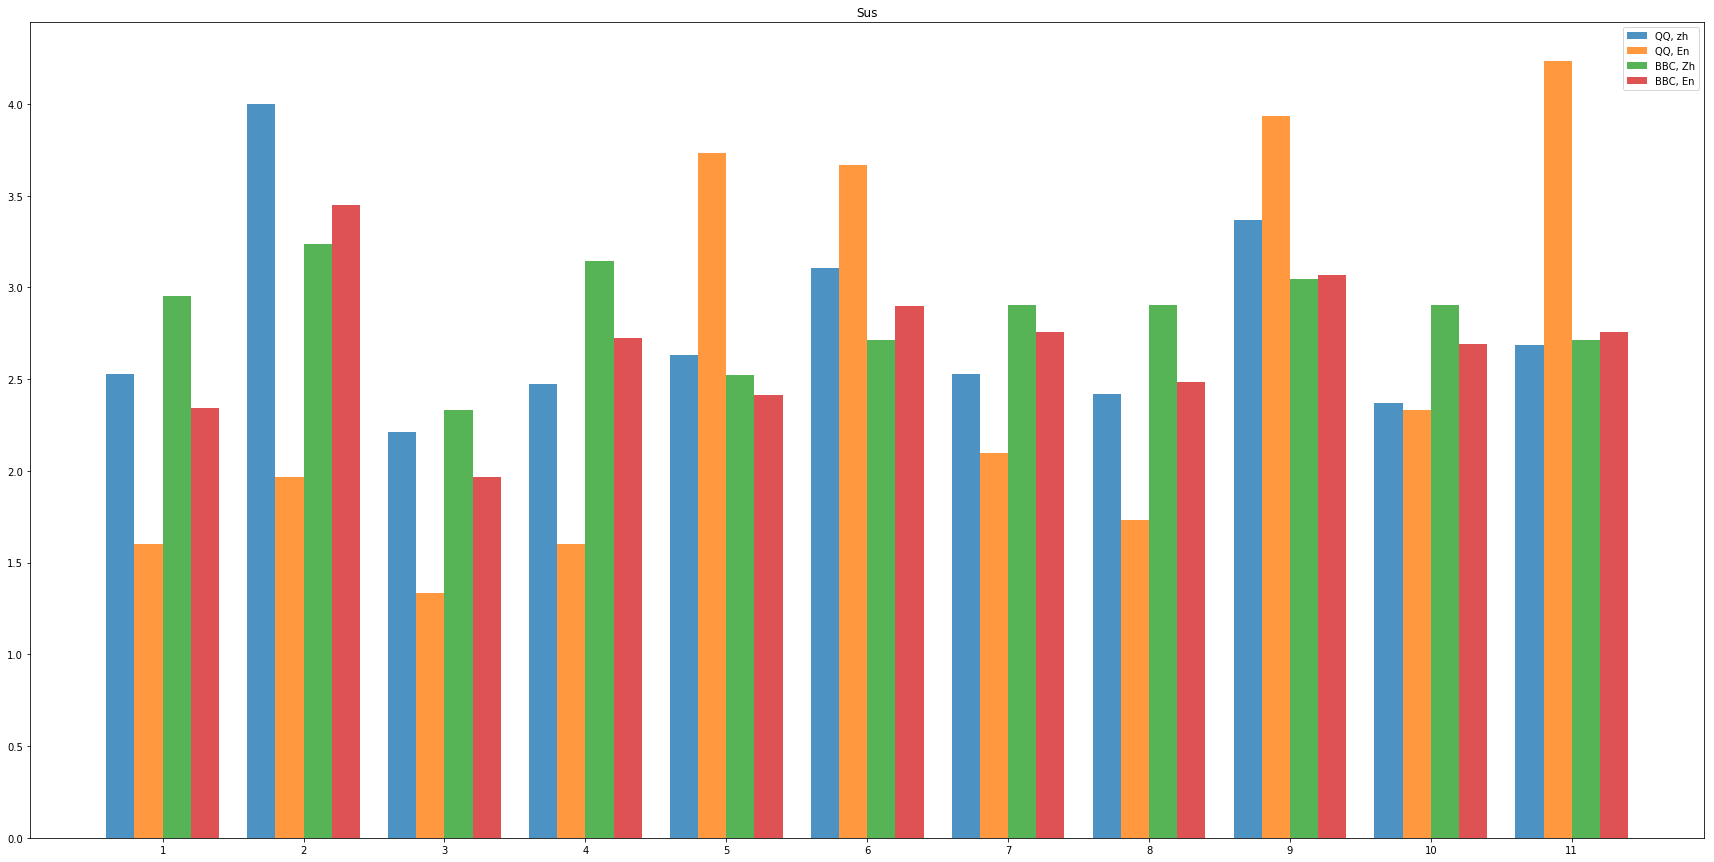

In [37]:
sus_bar(q_qq_zh_sus, q_qq_en_sus, q_bbc_zh_sus, q_bbc_en_sus, 'Sus')

### Questions:
1. I liked the design of the site
2. The design of this site was similar too other news sites
3. I think that I would like to use this site frequently
4. I thought the site was easy to use
5. The design of this site was unusual to me
6. I thought there was too much inconsistency in this site
7. I felt very confident using the site
8. I thought the material i was looking for was easy to find
9. I found the site very cumbersome to use
10. I thought that the amount of information on this site was too sparse
11. I felt overwhelmed using this site


## Sus Conclusion
so far.. It seems like the chinese users over all was better at finding information on both sites. Also looking at the sus we can clearly see that chinese people found both sites similary difficult to use. English speakers on the other hand found the chinese inspired QQ site both harder to use and where also disliked the site quite a lot more than the bbc site. It should also be noted that the chinese users had lower correct scores. conitnue....
